In [1]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
home directory is C:\Users\BMH_work\
y1000plus_tools dir is C:\Users\BMH_work\github\y1000plus_tools\
y1000plus data dir is C:\Users\BMH_work\github\y1000plus_tools\genomes\y1000plus\
Added C:\Users\BMH_work\github\y1000plus_tools\ to path
Added C:\Users\BMH_work\github\yeast_esr_expression_analysis\ to path
Importing y1000plus_tools.py
home directory is unset
y1000plus_tools dir is unset
y1000plus data dir is unset
Importing yeast_esr_exp.  If autoreload, may need to reset base_dir and data_processing dir 
  yeast_esr_exp.base_dir=base_dir 
 yeast_esr_exp.data_processing_dir = data_processing_dir
sys.path : 

['C:\\Users\\BMH_work\\github\\y1000plus_tools\\scripts', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\python37.zip', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\DLLs', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1000_plus_env\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\envs\\y1

In [2]:
#Convert GND2_GND1 Fasta file to remove spaces to keep them for the sequence name

fname_in = y1000plus_dir + os.path.normpath('promoter_sets/OG1488_GND2_GND1.fasta')
fname_out = y1000plus_dir + os.path.normpath('promoter_sets/OG1488_GND2_GND1_fimo_full.fasta')

with open(fname_in, 'r') as f_in:
    with open(fname_out,'w') as f_out:
        for line in f_in:
            if line[0]=='>':
                line_out = '__'.join(line.split(' '))  #This has all the information
                #line_out = '>' + line.split(" ")[1].split('=')[1] + '\n'  #This only includes the y1000_id
            else:
                line_out = line
            f_out.write(line_out)
                

In [7]:
#Fimo Call: 
fimo -oc /mnt/c/Users/BMH_work/github/y1000plus_tools/genomes/y1000plus/promoter_sets/fimo_results/OG1488_GND2_GND1 /mnt/c/Users/BMH_work/github/yeast_esr_expression_analysis/expression_data/motifs/JASPAR2018_CORE_fungi_non-redundant_pfms_meme.meme /mnt/c/Users/BMH_work/github/y1000plus_tools/genomes/y1000plus/promoter_sets/OG1488_GND2_GND1_fimo_full.fasta


In [18]:
motif_table = pd.read_table(y1000plus_dir + "promoter_sets\\fimo_results\\OG1488_GND2_GND1\\fimo.tsv", engine= 'python', skipfooter=4)

columns = [field.split('=')[0] for field in motif_table.loc[0,'sequence_name'].split('__')]
col_rename = {'strand':'chr_strand', 'start':'chr_strand', 'end':'chr_strand'}
columns_new = []
for col in columns:
    if col in col_rename.keys():
        columns_new.append(col_rename[col])
    else: 
        columns_new.append(col)
columns_new

     

field_cols = {}
for ind, row in motif_table.iterrows():
    seq_full = row['sequence_name'].split('__')
    field_cols[ind]=tuple((field.split('=')[1] for field in seq_full))

metadata = pd.DataFrame.from_dict(field_cols, columns=columns_new, orient='index')
motif_table = pd.concat([motif_table, metadata], axis = 1)
motif_table.drop('sequence_name', axis=1, inplace=True)
motif_table.set_index(['motif_alt_id', 'species','gene_id'], inplace=True)
motif_table.sort_index(inplace=True)

In [20]:
motifs = list(set(subset.index.get_level_values('motif_alt_id')))


In [22]:
len(motifs)

55

In [19]:
motif_table

motif_id  \
motif_alt_id species                                         gene_id              
ABF1         lachancea_cidri                                 Seq_1747  MA0265.1   
             lachancea_dasiensis                             Seq_4888  MA0265.1   
             lachancea_fantastica                            Seq_185   MA0265.1   
             lachancea_fermentati                            Seq_3416  MA0265.1   
             lachancea_lanzarotensis                         Seq_1349  MA0265.1   
...                                                                         ...   
ZMS1         nakaseomyces_nivariensis                        Seq_5143  MA0441.1   
             yHAB148_kazachstania_intestinalis_160519        Seq_3782  MA0441.1   
             yHMPu5000034881_torulaspora_pretoriensis_160519 Seq_1280  MA0441.1   
                                                             Seq_4527  MA0441.1   
             zygosaccharomyces_bailii                        Seq_1396  MA0441.1   

                                                                       start  \
motif_alt_id species                                         gene_id           
ABF1         lachancea_cidri                                 Seq_1747    127   
             lachancea_dasiensis                             Seq_4888    236   
             lachancea_fantastica                            Seq_185     477   
             lachancea_fermentati                            Seq_3416    132   
             lachancea_lanzarotensis                         Seq_1349    264   
...                                                                      ...   
ZMS1         nakaseomyces_nivariensis                        Seq_5143    484   
             yHAB148_kazachstania_intestinalis_160519        Seq_3782    110   
             yHMPu5000034881_torulaspora_pretoriensis_160519 Seq_1280     30   
                                                             Seq_4527     29   
             zygosaccharomyces_bailii                        Seq_1396    407   

                                                                       stop  \
motif_alt_id species                                         gene_id          
ABF1         lachancea_cidri                                 Seq_1747   142   
             lachancea_dasiensis                             Seq_4888   251   
             lachancea_fantastica                            Seq_185    492   
             lachancea_fermentati                            Seq_3416   147   
             lachancea_lanzarotensis                         Seq_1349   279   
...                                                                     ...   
ZMS1         nakaseomyces_nivariensis                        Seq_5143   492   
             yHAB148_kazachstania_intestinalis_160519        Seq_3782   118   
             yHMPu5000034881_torulaspora_pretoriensis_160519 Seq_1280    38   
                                                             Seq_4527    37   
             zygosaccharomyces_bailii                        Seq_1396   415   

                                                                      strand  \
motif_alt_id species                                         gene_id           
ABF1         lachancea_cidri                                 Seq_1747      +   
             lachancea_dasiensis                             Seq_4888      -   
             lachancea_fantastica                            Seq_185       -   
             lachancea_fermentati                            Seq_3416      +   
             lachancea_lanzarotensis                         Seq_1349      +   
...                                                                      ...   
ZMS1         nakaseomyces_nivariensis                        Seq_5143      -   
             yHAB148_kazachstania_intestinalis_160519        Seq_3782      -   
             yHMPu5000034881_torulaspora_pretoriensis_160519 Seq_1280      +   
                                          

In [11]:
subset = motif_table.loc[(slice(None),['yHAB160_kazachstania_kunashirensis_160519', 'saccharomyces_cerevisiae'], slice(None)), :]


motif_count = {('yHAB160_kazachstania_kunashirensis_160519','Seq_407'):[], 
               ('saccharomyces_cerevisiae','YGR256W'): [], 
               ('saccharomyces_cerevisiae', 'YHR183W'): []
              }

motif_params = {('yHAB160_kazachstania_kunashirensis_160519','Seq_407'):'grey', 
               ('saccharomyces_cerevisiae','YGR256W'): 'red', 
               ('saccharomyces_cerevisiae', 'YHR183W'): 'blue'
              }

motifs = list(set(subset.index.get_level_values('motif_alt_id')))

for motif in motifs:

# specs = list(subset.index.get_level_values('species'))
# gene_ids = list(subset.index.get_level_values('gene_id'))

    for (spec, gene_id) in motif_count.keys(): 
        try:
            motif_count[(spec,gene_id)].append(len(subset.loc[(motif, spec, gene_id),:]))
        except KeyError:
            motif_count[(spec,gene_id)].append(0)

Text(0, 0.5, 'Binding Sites')

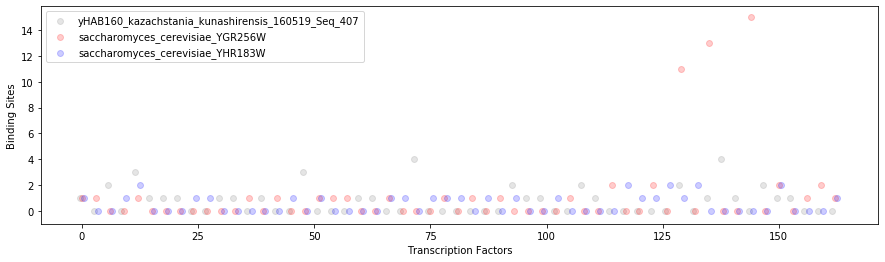

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,4))

jj=-0.5

for (spec, gene_id), count_list in motif_count.items():
    ax.scatter(np.array(range(len(motifs)))*3+jj, count_list, label=spec + '_' + gene_id, alpha=0.2, color = motif_params[(spec,gene_id)])
    jj= jj+0.5
ax.legend()

ax.set_xlabel('Transcription Factors')
ax.set_ylabel('Binding Sites')

In [23]:
low_stre_prots=[("tetrapisispora_blattae","Seq_92"),
                ("yHMPu5000035629_yueomyces_sinensis_160519","Seq_977"), 
                ("yHAB155_kazachstania_spencerorum_160519","Seq_5608"),
                ("yHAB153_kazachstania_rosinii_160519", "Seq_895"),
                ("yHAB160_kazachstania_kunashirensis_160519","Seq_407"),
                ("yHAB134_kazachstania_turicensis_160519", "Seq_2234")
               ]

sacc_high_stre_prots = [("saccharomyces_eubayanus", "Seq_2030"),
                      ("saccharomyces_uvarum", "Seq_4669"),
                      ("saccharomyces_aboricola", "Seq_4380"),
                      ("saccharomyces_kudriavzevii", "Seq_1713"),
                      ("saccharomyces_paradoxus", "Seq_87"),
                      ("saccharomyces_cerevisiae", "YGR256W")
                     ]

sacc_low_stre_prots =[("saccharomyces_eubayanus", "Seq_879"),
                      ("saccharomyces_uvarum", "Seq_4794"),
                      ("saccharomyces_aboricola", "Seq_3052"),
                      ("saccharomyces_kudriavzevii", "Seq_185"),
                      ("saccharomyces_mikatae", "Seq_4845"),
                      ("saccharomyces_paradoxus", "Seq_2121"),
                      ("saccharomyces_cerevisiae", "YHR183W")
                   ]

groups={'Low STRE no Gene Conversion': low_stre_prots, 
        'Low STRE Gene Conversion': sacc_low_stre_prots,
        'High STRE' : sacc_high_stre_prots}

In [36]:
motifs = list(set(subset.index.get_level_values('motif_alt_id')))


motif_count_mean= {}
for group_name, group in groups.items():
    motif_count_group = {}
    for (spec, gene_id) in group:
        motif_count_spec = []
        for motif in motifs:
            try: 
                mc = len(motif_table.loc[(motif, spec, gene_id),:])
            except KeyError: 
                mc = 0
            motif_count_spec.append(mc)
        motif_count_group[spec] = motif_count_spec
    motif_count_group_df = pd.DataFrame(motif_count_group, index=motifs)
    motif_count_mean[group_name] = motif_count_group_df.mean(axis=1)

motif_count_mean_df = pd.DataFrame(motif_count_mean, index=motifs)
# specs = list(subset.index.get_level_values('species'))
# gene_ids = list(subset.index.get_level_values('gene_id'))

#     for (spec, gene_id) in motif_count.keys(): 
#         try:
#             motif_count[(spec,gene_id)].append(len(subset.loc[(motif, spec, gene_id),:]))
#         except KeyError:
#             motif_count[(spec,gene_id)].append(0)

In [52]:
motif_count_mean_df.sort_values('High STRE', ascending=False)

,Low STRE no Gene Conversion,Low STRE Gene Conversion,High STRE
SPT15,3.500000,0.000000,10.166667
NHP6A,2.500000,0.142857,8.166667
NHP6B,1.833333,0.571429,7.166667
YER130C,0.500000,0.000000,1.500000
RPH1,0.000000,0.142857,1.333333
SUT2,0.000000,0.000000,1.166667
AZF1,1.500000,1.142857,1.166667
OAF1,0.000000,0.000000,1.166667
GSM1,0.000000,0.000000,1.000000
STB5,0.833333,1.571429,1.000000


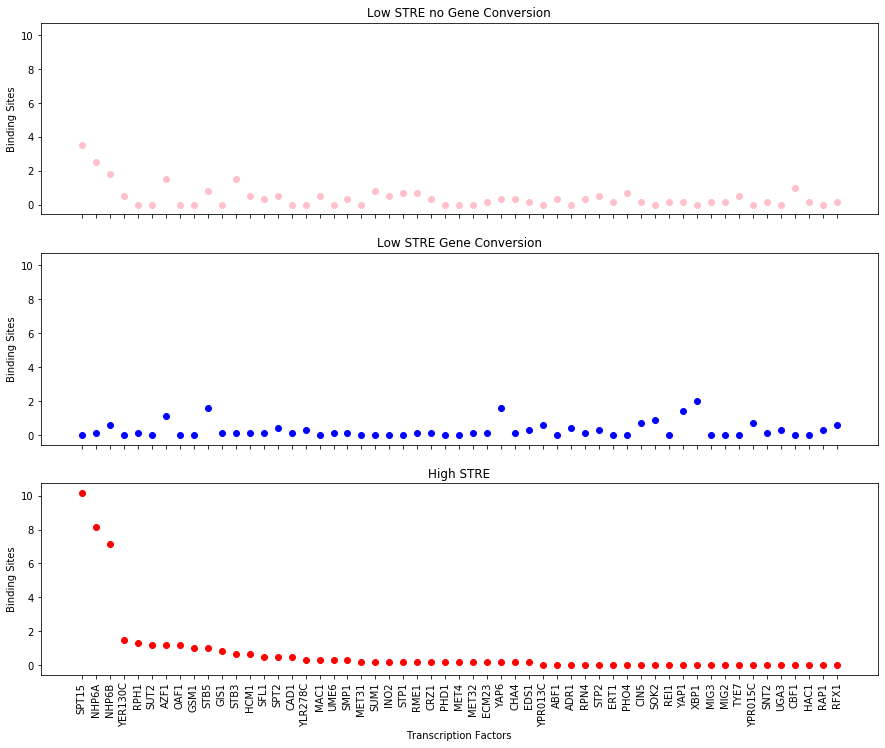

In [56]:
fig, axarr = plt.subplots(3,1, figsize=(15,12), sharex=True, sharey = True)

colors = {'Low STRE no Gene Conversion': 'pink', 
          'Low STRE Gene Conversion': 'blue',
          'High STRE' : 'red'}

motif_count_mean_df_sorted = motif_count_mean_df.sort_values('High STRE', ascending=False)

for jj, group_name in enumerate(groups.keys()): 
    ax = axarr[jj]
    ax.scatter(np.array(range(len(motifs))), motif_count_mean_df_sorted[group_name], label=group_name, color = colors[group_name])   
    #ax.legend()
    ax.set_title(group_name)
    
    if jj==2: 
        ax.set_xlabel('Transcription Factors')
        ax.set_xticks(range(len(motifs)))
        ax.set_xticklabels(motif_count_mean_df_sorted.index, rotation=90)
    ax.set_ylabel('Binding Sites')
    


In [90]:
motif_count = {('yHAB160_kazachstania_kunashirensis_160519','Seq_407'):[], 
               ('saccharomyces_cerevisiae','YGR256W'): [], 
               ('saccharomyces_cerevisiae', 'YHR183W'): []
              }

    

['EDS1',
 'LYS14',
 'MET32',
 'GSM1',
 'YPR015C',
 'XBP1',
 'YLR278C',
 'RAP1',
 'TYE7',
 'SUM1',
 'SPT2',
 'YKL222C',
 'DAL81',
 'NHP6B',
 'SFL1',
 'MAC1',
 'STB5',
 'CBF1',
 'NHP6A',
 'STB3',
 'ABF1',
 'GIS1',
 'STP1',
 'RDR1',
 'MET4',
 'STE12',
 'SWI5',
 'RPH1',
 'CAD1',
 'SUT2',
 'FKH1',
 'TBF1',
 'SMP1',
 'OAF1',
 'YPR013C',
 'AFT1',
 'ECM23',
 'UME6',
 'SPT23',
 'INO2',
 'ADR1',
 'HCM1',
 'RDS1',
 'PDR8',
 'GAT4',
 'HAP1',
 'UGA3',
 'RTG3',
 'ACE2',
 'CIN5',
 'NDT80',
 'URC2',
 'INO4',
 'RFX1',
 'SPT15',
 'YAP6',
 'YAP1',
 'YPR196W',
 'THI2',
 'SOK2',
 'RLM1',
 'STP2',
 'PHO4',
 'PHD1',
 'CRZ1',
 'AZF1',
 'MET31',
 'HSF1',
 'YER130C']

In [70]:
motif_table.columns

Index(['motif_id', 'motif_alt_id', 'start', 'stop', 'strand', 'score',
       'p-value', 'q-value', 'matched_sequence', 'species', 'y1000_id',
       'gene_id', 'gene_full', 'scaffold', 'chr_strand', 'chr_strand',
       'chr_strand', 'L'],
      dtype='object')

In [21]:
"{} different motifs".format(len(set(motif_table['motif_alt_id'])))

'158 different motifs'

In [29]:
seq_full = 'species=kluyveromyces_lactis__y1000_id=50_457__gene_id=Seq_458__gene_full=augustus_masked-CR382121-processed-gene-8.56__scaffold=CR382121__strand=+__start=814259__end=814959__L=700'
seq_full.strip('>').strip('\n')
seq_full_list = seq_full.split('__')


['species=kluyveromyces_lactis',
 'y1000_id=50_457',
 'gene_id=Seq_458',
 'gene_full=augustus_masked-CR382121-processed-gene-8.56',
 'scaffold=CR382121',
 'strand=+',
 'start=814259',
 'end=814959',
 'L=700']

In [92]:
motif_list

NameError: name 'motif_list' is not defined

In [51]:
pd.concat([a,b], axis=1)

,0,1,hey,there,man
A,1,2,5,6,7
B,3,4,8,9,10


In [40]:
pd.DataFrame.from_dict?

In [59]:
a = [1,2,3]


In [ ]:
a.re

In [61]:
columns_new

NameError: name 'columns_new' is not defined

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence,species,y1000_id,gene_id,gene_full,scaffold,chr_strand,chr_strand,chr_strand,L
0,MA0418.1,YAP6,species=lachancea_waltii__y1000_id=65_1708__ge...,180,199,-,20.0629,6.920000e-09,0.000904,TGTTTGATTACGTCAGCGGC,lachancea_waltii,65_1708,Seq_1709,snap_masked-AADM01000014.1-processed-gene-0.155,AADM01000014.1,-,92518,91818,700
1,MA0376.1,RTG3,species=ascoidea_rubescens__y1000_id=6_503__ge...,147,166,+,18.5122,9.290000e-08,0.009060,AGTATAGCACGTGCTCAGTC,ascoidea_rubescens,6_503,Seq_504,snap_masked-scaffold_14-processed-gene-3.161,scaffold_14,-,410111,409411,700
2,MA0376.1,RTG3,species=yHAB153_kazachstania_rosinii_160519__y...,106,125,-,18.2358,1.390000e-07,0.009060,GGAGGAGCACGTGCTCTGAA,yHAB153_kazachstania_rosinii_160519,152_84,Seq_85,snap_masked-scf7180000099708-processed-gene-0.13,scf7180000099708,+,81388,82088,700
3,MA0386.1,SPT15,species=wickerhamomyces_anomalus__y1000_id=139...,437,457,-,18.2970,1.790000e-07,0.013500,GGTGAGGTATATATAATCGTG,wickerhamomyces_anomalus,139_1011,Seq_1012,augustus_masked-scaffold_1-processed-gene-28.114,scaffold_1,+,2833396,2834096,700
4,MA0377.1,SFL1,species=yHAB132_kazachstania_martiniae_160519_...,516,536,-,16.4228,1.920000e-07,0.024000,TTGAAAAGAGAAGAAAAATAA,yHAB132_kazachstania_martiniae_160519,145_4189,Seq_4190,snap_masked-scf7180000030440-processed-gene-0.69,scf7180000030440,-,115736,115036,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,MA0360.1,RDR1,species=yHMPu5000034866_zygosaccharomyces_bisp...,75,82,-,11.9146,1.000000e-04,0.888000,AGCGGAAA,yHMPu5000034866_zygosaccharomyces_bisporus_160519,219_2999,Seq_3000,augustus_masked-flattened_line_236-processed-g...,flattened_line_236,+,0,633,633
3409,MA0360.1,RDR1,species=yHAB132_kazachstania_martiniae_160519_...,226,233,-,11.9146,1.000000e-04,0.888000,AGCGGAAA,yHAB132_kazachstania_martiniae_160519,145_4189,Seq_4190,snap_masked-scf7180000030440-processed-gene-0.69,scf7180000030440,-,115736,115036,700
3410,MA0360.1,RDR1,species=saccharomyces_eubayanus__y1000_id=111_...,500,507,-,11.9146,1.000000e-04,0.888000,AGCGGAAA,saccharomyces_eubayanus,111_878,Seq_879,augustus_masked-chrXV-processed-gene-6.84,chrXV,+,666704,667404,700
3411,MA0354.1,PDR8,species=kazachstania_naganishii__y1000_id=49_4...,521,528,-,10.9390,1.000000e-04,1.000000,GCGGAGAG,kazachstania_naganishii,49_4462,Seq_4463,genemark-HE978324-processed-gene-0.76,HE978324,-,69146,68446,700


In [20]:
#Plot full tree and promoters
N_tree_dict = {'GND2_GND1':('7',''),
               'GPM2_GPM3':('4',''),
               'EGO4_EGO2':('_einsi_9','einsi_')}

goi_pair = 'GND2_GND1'#'GPM2_GPM3'#'GPM2_GPM3' #'GND2_GND1'#
og = 'OG1488'#goi_pair_og_lookup[goi_pair]


fname_tree = os.path.normpath(y1000plus_dir + 'proteins_og/' + goi_pair + '_' + og + '/tree/run' + N_tree_dict[goi_pair][0] + '/' + goi_pair + '_' + og + '_aln_' + N_tree_dict[goi_pair][1] + 'trimmed.fasta.treefile')
t = Tree(fname_tree, format=1)  

fname_out = home_dir + 'scratch/' + goi_pair + '.svg'


#Load Promoter file and find STRE/PDS/TATA box in promoters outputs proms for plotting
promoters_fname = y1000plus_dir + os.path.normpath('promoter_sets/' + og + '_' + goi_pair + '.fasta')
# proms = y1000plus_tools.prom_scan_example(goi_pair, promoters_fname,y1000_species_subset)

# motif_names = ['TATA', 'STRE']
# branch_labels = 'all' #'bootstrap'  #

# (t,ts) = y1000plus_tools.plot_tree_proms(goi_pair, prom_phyls, t, y1000_species_subset, proms, motif_names, branch_labels)

# #t.render(fname_out, tree_style=ts)
# t.render('%%inline', tree_style=ts)


In [ ]:
#plot_tree_proms(goi_pair, prom_phyls, t, y1000_species_subset, proms, motif_names, branch_labels):
#makes tree ready to render for a goi pair and given promoters. 
#
#branch_labels can be 
# 'all':  puts branch length on top, bootstrap/alrt on the bottom or 
# 'bootstrap': Just puts bootstrap on top

sacc_families = {'Candida': 'Post_WGH',
             'Kazachstania': 'Post_WGH',
             'Nakaseomyces': 'Post_WGH',
             'Naumovozyma': 'Post_WGH',
             'Saccharomyces': 'Post_WGH',
             'Tetrapisispora': 'Post_WGH',
             'Vanderwaltozyma': 'Post_WGH',
             'Yueomyces': 'Post_WGH',
             'Zygosaccharomyces': 'ZT',
             'Zygotorulaspora': 'ZT',
             'Torulaspora': 'ZT',
             'Kluyveromyces': 'KLE',
             'Lachancea': 'KLE',
             'Eremothecium': 'KLE',
             'Ashbya': 'KLE'
            }

#Color Node by species: 
sacc_colors = {'KLE': "#deb9f6", #e4cee4",#"#C6AFE9", 
               'ZT': "YellowGreen",
               'Post_WGH': "LightYellow" #White" # "LightYellow"
              }

post_WGH_colors = {'low':  '#8cc3f6', # '#d3d3fe', #'#3192ff',#'#7eeaf7', ##2DD7ED',      #'#e6fcff', 
                   'high': '#fcbba1'} #'#59E3EB'}  #'#ffebe6'}


#     node_color_dict = {'KLE': "#C6AFE9",
#                        'ZT': "YellowGreen",
#                        'Post_WGH': "LightYellow",   #default color for post WGH
#                        'low': '#7eeaf7',    #syntenic orthologs of low LFC ohnolog
#                        'high': '#fcbba1',    #syntenic orthologs of high LFC ohnolog
#                        'outgroup': 'LightGrey'
#                       }



#Load Tree
#t = Tree(fname_tree, format=1)
ts = TreeStyle()
ts.show_leaf_name = True #False
if branch_labels == 'all':
    ts.show_branch_length = True
else:
    ts.show_branch_length = False

# #assign Colors, show support values
# for node in t.traverse():
#     if node.is_leaf():
#         #color node by major clade / family if in Sacch clade
#         row = y1000_species_subset[y1000_species_subset['original_genome_id']==species]
#         maj_clade = row['Major clade'].values[0]

#         if maj_clade == 'Saccharomycetaceae':
#             genus = row['Genus'].values[0]
#             node_color = sacc_colors[sacc_families[genus]]
#             if node.name in prom_phyls[goi_pair]['low']: 
#                 node_color = post_WGH_colors['low']
#             elif node.name in prom_phyls[goi_pair]['high']: 
#                 node_color = post_WGH_colors['high']    
#         #species == outgroup_orig_genome:
#         #elif species == 'hanseniaspora_vinae':
#         #    node_color = 'LightGrey'
#         else:
#             node_color = 'LightGrey'
#             #node_color = maj_clade_colors[maj_clade]

#         nstyle = NodeStyle()
#         nstyle['bgcolor']=node_color
#         node.set_style(nstyle)

#     else:    # If node is not a leaf, add the support label
#         node_label = TextFace(node.name)
#         node.add_face(node_label, column=1, position = "branch-bottom")
#t.render('%%inline', tree_style=ts)

#Plots promoters for a given tree. 


# protein_fname_base = y1000plus_dir + os.path.normpath('proteins_og/' + goi_pair + '_' + og)
# tree_fname = protein_fname_base + '_aln_trimmed.fasta.treefile'
t.ladderize()
L_prom = 700
height = 15
seq = '-'*L_prom

motif_colors = {'PDS': 'yellow', 'TATA': 'blue', 'STRE': 'red'}
motif_lengths = {'PDS': 3*6, 'TATA': 3*8, 'STRE': 3*5 }  #They are triple the size

#box params:
width_box = 40
height_box = 55

cmap_STRE = cm.get_cmap('Reds')
vmin = 0.0
vmax = 8.0
cmap_STRE_norm = colors.Normalize(vmin=vmin, vmax=vmax)

cmap_TATA = cm.get_cmap("Blues")

# To get rid of a set of species for the visualization
# if less_nonsacc: 
#     nonsacc_visualization_subset = pd.read_csv(y1000plus_dir + 'species_visualization_subset.csv')
#     species_subset = ( set(nonsacc_visualization_subset['original_genome_id']) | \
#                        set(y1000_species[y1000_species['Major clade']=='Saccharomycetaceae']['original_genome_id']) ) # | \
#                        #set(y1000_species[y1000_species['Species name']==outgroup]['original_genome_id'])
#                      #)
#     y1000_species_subset = y1000_species[(y1000_species['original_genome_id'].isin(species_subset))]
#     node_subset = []
#     #For each node in the tree:
#     for node in t.iter_leaves():  
#         #Get the promoter sequence with motif info, make it into a motif list
#         if 'saccharomyces_cerevisiae' in node.name:
#             species='saccharomyces_cerevisiae'
#         else: 
#             species = '_'.join(node.name.split('_')[:-2])
#         if species in species_subset: 
#             node_subset.append(node.name)

#     t.prune(node_subset)
#     t.ladderize()

# for node in t.iter_leaves():  
#     print(node.name)

#For each node in the tree:
for node in t.traverse(): 
    #name_face = AttrFace("name",fsize=15)
    #node.add_face(name_face, column=0, position="branch-right")     
    if node.is_leaf():#Get the promoter sequence with motif info, make it into a motif list
        if 'saccharomyces_cerevisiae' in node.name:       
            species='saccharomyces_cerevisiae'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        elif 'candida_albicans' in node.name: 
            species = 'candida_albicans'
            gene_id = species + '@' + node.name.split(species +'_')[1]
        else: 
            species = '_'.join(node.name.split('_')[:-2])
            gene_id = species + '@' + '_'.join(node.name.split('_')[-2:])

        #color node by major clade / family if in Sacch clade
        row = y1000_species_subset[y1000_species_subset['original_genome_id']==species]
        maj_clade = row['Major clade'].values[0]

        if maj_clade == 'Saccharomycetaceae':
            genus = row['Genus'].values[0]
            node_color = sacc_colors[sacc_families[genus]]
            if node.name in prom_phyls[goi_pair]['low']: 
                node_color = post_WGH_colors['low']
            elif node.name in prom_phyls[goi_pair]['high']: 
                node_color = post_WGH_colors['high']    
        #species == outgroup_orig_genome:
        #elif species == 'hanseniaspora_vinae':
        #    node_color = 'LightGrey'
        else:
            node_color = 'LightGrey'
            #node_color = maj_clade_colors[maj_clade]

        nstyle = NodeStyle()
        nstyle['bgcolor']=node_color
        node.set_style(nstyle)

        prom_results = proms.loc[gene_id]

    #     simple_motifs = [
    #             # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
    #             [10, 60, ">", None, 10, "black", "red", None],
    #             [120, 150, "<", None, 10, "black", "red", None]
    #     ]
        motifs = []

        for motif_name in motif_names: #, 'PDS']:   #Leaving out PDS
            motif_len = motif_lengths[motif_name]
            motif_color = motif_colors[motif_name]
            if prom_results[motif_name + '_count'] >0:

                for motif in prom_results[motif_name + '_full_features']:
                    loc = motif[0]
                    if loc <= L_prom:
                        direction = motif[1]
                        shape = '>'
                        start = L_prom-loc
                        stop = L_prom-loc + motif_len
                        if direction == 'rev':
                            shape = '<'
                            start = L_prom-loc-motif_len
                            stop = L_prom -loc
                        motifs.append([start,stop,shape,None, height, "black", motif_color, None])

        seqFace = SeqMotifFace(seq, motifs=motifs, seq_format="-")
        node.add_face(seqFace, column=0, position="aligned")


        #Add face for STRE count within 700bp

        motif_name = 'STRE'
        L_STRE_count = 700

        N_STRE = 0
        for result in prom_results['STRE_full_features']:
            if result[0]<L_STRE_count:
                N_STRE = N_STRE+1

        rgb = colors.to_hex(cmap_STRE(cmap_STRE_norm(N_STRE)))

        rectFace_STRE = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb, 
                            label= {"text": str(N_STRE), 
                                    "color": 'black', 
                                    "fontsize": 20, 
                                    "font": 'Verdana'
                                   }
                           )
        node.add_face(rectFace_STRE, column = 1, position= "aligned")

        motif_name = 'TATA'
        L_TATA = 300

        TATA = 0.0
        for result in prom_results['TATA_full_features']:
            if result[0]<L_TATA:
                TATA = 1.0

        rgb = colors.to_hex(cmap_TATA(TATA))

        rectFace_TATA = RectFace(width=width_box, height=height_box, fgcolor='black', bgcolor=rgb)

        node.add_face(rectFace_TATA, column=2, position="aligned")
    else:  # If node is not a leaf, add the support label
        if branch_labels=='all': 
            node_label = TextFace(node.name)
            node.add_face(node_label, column=1, position = "branch-bottom")
        elif branch_labels =='bootstrap':
            node_label = TextFace(node.name.split('/')[0])
            node.add_face(node_label, column=1, position = "branch-top")
        else: 
            raise ValueError('invalid value for branch_labels: {}'.format(branch_labels))


#    return t, ts